   EmployeeID  Education  JoiningYear       City  Country         Region  \
0           1  Bachelors         2017    Toronto   Canada  North America   
1           2  Bachelors         2013       Pune    India           Asia   
2           3  Bachelors         2014  New Delhi    India           Asia   
3           4    Masters         2016  Vancouver   Canada  North America   
4           5    Masters         2017     Berlin  Germany         Europe   

   PaymentTier  Age  Gender  ExperienceInCurrentDomain  Performance  \
0            3   34    Male                          0    74.967142   
1            1   28  Female                          3    68.617357   
2            3   38  Female                          2    76.476885   
3            3   27    Male                          5    85.230299   
4            3   24    Male                          2    67.658466   

   TeamEngagement  Collaboration  Flexibility  
0        5.229156       4.731940     4.003262  
1        4.974894   

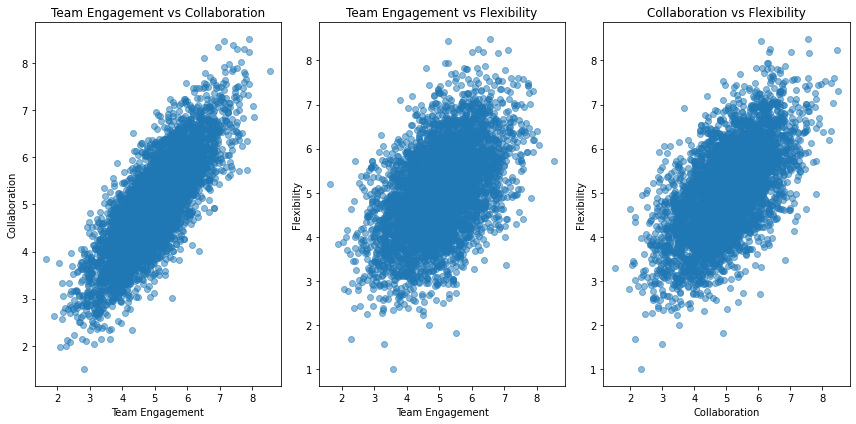

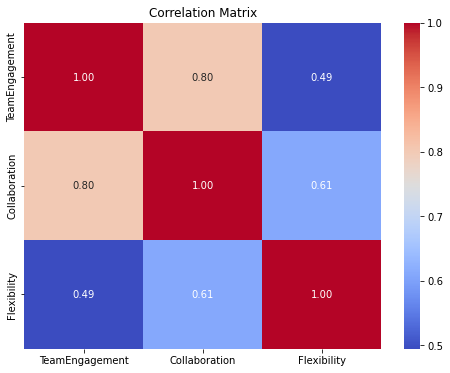

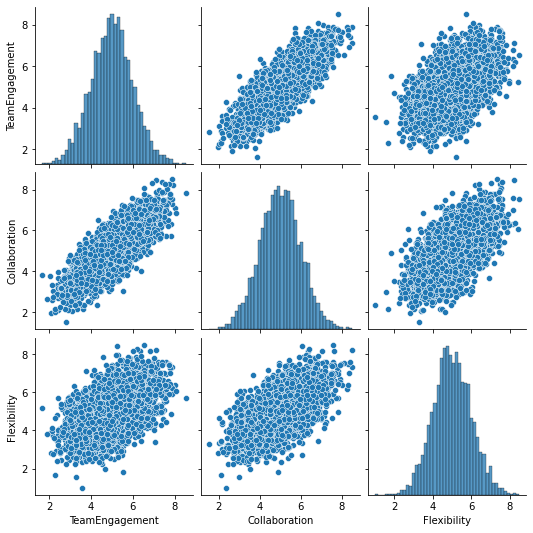

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import multivariate_normal

# Load the original CSV file
file_path = 'Employee_testdata_with_performance.csv'
df = pd.read_csv(file_path)

# Set the number of samples to generate
num_samples = df.shape[0]

# Define the mean and covariance matrix for the multivariate normal distribution
mean = [5, 5, 5]  # Means for team engagement, collaboration, and flexibility
cov = [
    [1, 0.8, 0.5],  # Covariance matrix
    [0.8, 1, 0.6],
    [0.5, 0.6, 1]
]

# Generate synthetic data
synthetic_data = multivariate_normal(mean, cov, num_samples)

# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame(synthetic_data, columns=['TeamEngagement', 'Collaboration', 'Flexibility'])

# Merge the synthetic data with the original data
df_updated = pd.concat([df, synthetic_df], axis=1)

# Save the updated DataFrame to a new CSV file
updated_file_path = 'Employee_testdata_with_synthetic_behavior_multivariance_1.csv'
df_updated.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataframe
print(df_updated.head())

# Scatter plot for synthetic data
plt.figure(figsize=(12, 6))

# Scatter plots for the synthetic data
plt.subplot(1, 3, 1)
plt.scatter(df_updated['TeamEngagement'], df_updated['Collaboration'], alpha=0.5)
plt.xlabel('Team Engagement')
plt.ylabel('Collaboration')
plt.title('Team Engagement vs Collaboration')

plt.subplot(1, 3, 2)
plt.scatter(df_updated['TeamEngagement'], df_updated['Flexibility'], alpha=0.5)
plt.xlabel('Team Engagement')
plt.ylabel('Flexibility')
plt.title('Team Engagement vs Flexibility')

plt.subplot(1, 3, 3)
plt.scatter(df_updated['Collaboration'], df_updated['Flexibility'], alpha=0.5)
plt.xlabel('Collaboration')
plt.ylabel('Flexibility')
plt.title('Collaboration vs Flexibility')

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df_updated[['TeamEngagement', 'Collaboration', 'Flexibility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pair plot
sns.pairplot(df_updated[['TeamEngagement', 'Collaboration', 'Flexibility']])
plt.show()
